# Filling missing data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('data/prudential-life-insurance-assessment/train.csv')

### Identifiying missing values

In [38]:
total points = df.shape[1]
missing = []
names = []
for i in df.columns:
    series = df[i]
    na = series.isna().sum()
    percent = na / 
    names.append(series.name)
    missing.append(na)
    
missing = pd.DataFrame(list(zip(names, missing)), 
               columns =['Column', 'Number of missing values'])

In [39]:
# Dropping zero values
indexNames = missing[ missing['Number of missing values'] == 0 ].index
missing.drop(indexNames, inplace=True)
missing

,Column,Number of missing values
12,Employment_Info_1,19
15,Employment_Info_4,6779
17,Employment_Info_6,10854
29,Insurance_History_5,25396
34,Family_Hist_2,28656
35,Family_Hist_3,34241
36,Family_Hist_4,19184
37,Family_Hist_5,41811
38,Medical_History_1,8889
47,Medical_History_10,58824


### Correlation between response and columns with missing values

In [40]:
corr = df.corr()
for i in missing.index:
    print("{}: {}. Missing values: {}".format(missing.loc[i, 'Column'], 
                                              corr.loc[missing.loc[i, 'Column'], 'Response'],
                                              missing.loc[i, 'Number of missing values']))

Employment_Info_1: 0.04085248323337571. Missing values: 19
Employment_Info_4: -0.024125382944161968. Missing values: 6779
Employment_Info_6: 0.01776578475797191. Missing values: 10854
Insurance_History_5: 0.020420193926166973. Missing values: 25396
Family_Hist_2: -0.0558996720571221. Missing values: 28656
Family_Hist_3: -0.003828032409109357. Missing values: 34241
Family_Hist_4: -0.0893776052516475. Missing values: 19184
Family_Hist_5: -0.018642248507825195. Missing values: 41811
Medical_History_1: 0.10305036782583012. Missing values: 8889
Medical_History_10: 0.029198860341542454. Missing values: 58824
Medical_History_15: 0.2773106184959633. Missing values: 44596
Medical_History_24: 0.01338370062564343. Missing values: 55580
Medical_History_32: 0.14453572606401383. Missing values: 58274


### Percent of missing data by feature

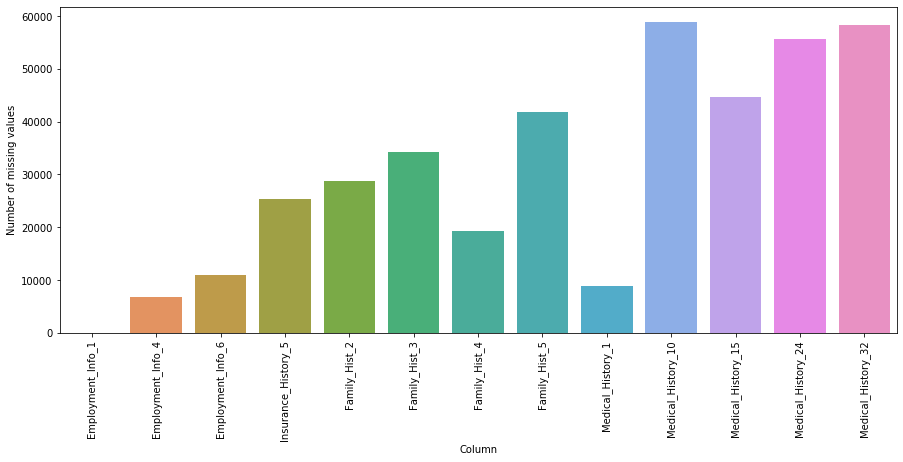

In [41]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing['Column'], y=missing['Number of missing values'])